In [1]:
# This is the creditcard dataset from Kaggle. Because of confidentiality, the variables has been 
# transformed by PCA. The only non-PCA columns are amount and class

# Data Wrangling

In [2]:
#Imports the neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC

#read the csv file and examine the first rows for the first glance
creditcard_df = pd.read_csv('creditcard.csv',header = 0)
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# As a condition befor PCA, the dataset must have been process to handle missing data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#valuables V1-V28 has almost zero means and medians
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759072e-12,-8.251146e-13,-9.655448e-13,8.321385e-13,1.649983e-13,4.248434e-13,-3.054696e-13,8.777981e-14,-1.179757e-12,...,-3.405785e-13,-5.723165e-13,-9.725860e-13,1.464148e-12,-6.987110e-13,-5.617884e-13,3.332082e-12,-3.518875e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Because the data has been pre-processed with PCA, it is impossible to understand the variables
# hence we don't have a reasonale way to determine outliners. However, we would still perform some
# EDA to have some understanding on the dataset

In [6]:
#The dataset is quite imbalance, majorrity of the records are not fraud, only 0.17% of the dataset
#contains fraud records
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# EDA

In [7]:
#Due to computational limitation, EDA on this dataset is avoided

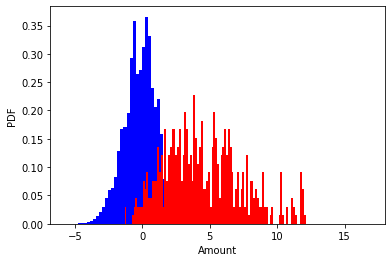

In [8]:
genuine_trans = creditcard_df[creditcard_df['Class'] == 0]
fraud_trans = creditcard_df[creditcard_df['Class'] == 1]
#genuine_trans['LogAmount'] = np.log(genuine_trans.mask(genuine_trans['Amount']==0)
#fraud_trans['LogAmount'] = np.log(fraud_trans['Amount'])
_ = plt.hist(genuine_trans['V4'], bins=100, density = True, color ='blue')
_ = plt.hist(fraud_trans['V4'], bins=100, density = True, color ='red')
_ = plt.xlabel('Amount')
_ = plt.ylabel('PDF')
plt.show()

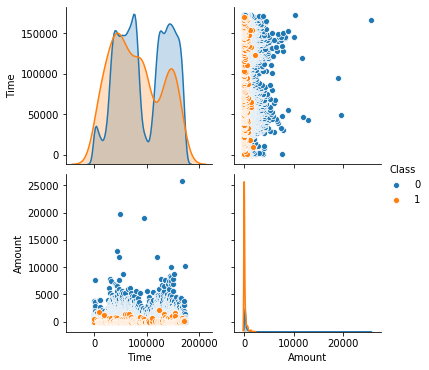

In [9]:
num_col = ['Time','Amount']
sns.pairplot(creditcard_df, x_vars = num_col, y_vars = num_col, hue = 'Class', diag_kind = 'kde')

In [10]:
pd.options.mode.use_inf_as_na = True
genuine_trans['LogAmount'] = np.log(genuine_trans['Amount'])
genuine_trans['LogAmount'].fillna(0)
fraud_trans['LogAmount'] = np.log(fraud_trans['Amount'])
fraud_trans['LogAmount'].fillna(0)
fraud_trans['LogAmount'][280143] =0

C:\Users\17138\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\17138\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\17138\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\17138\anaconda3\lib\site-packages\ipykernel_launcher.py:6: Sett

Text(0, 0.5, 'PDF')

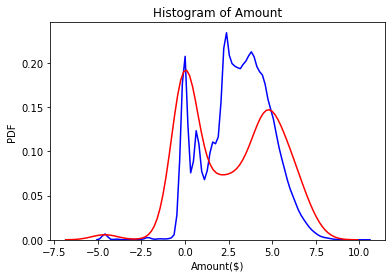

In [11]:
# seaborn histogram
sns.distplot(genuine_trans['LogAmount'], hist=False, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(fraud_trans['LogAmount'], hist=False, kde=True, 
             bins=100, color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Amount')
plt.xlabel('Amount($)')
plt.ylabel('PDF')

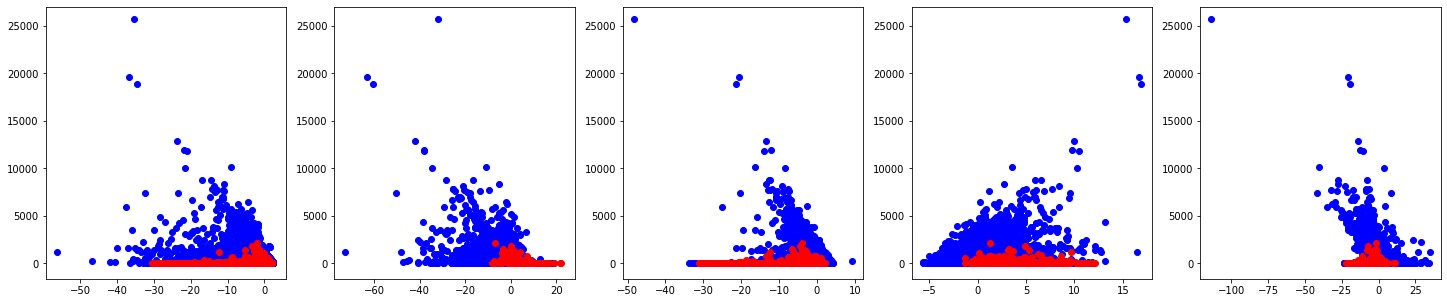

In [12]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V1'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V1'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V2'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V2'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V3'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V3'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['V4'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V4'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,5)
plt.scatter(genuine_trans['V5'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V5'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

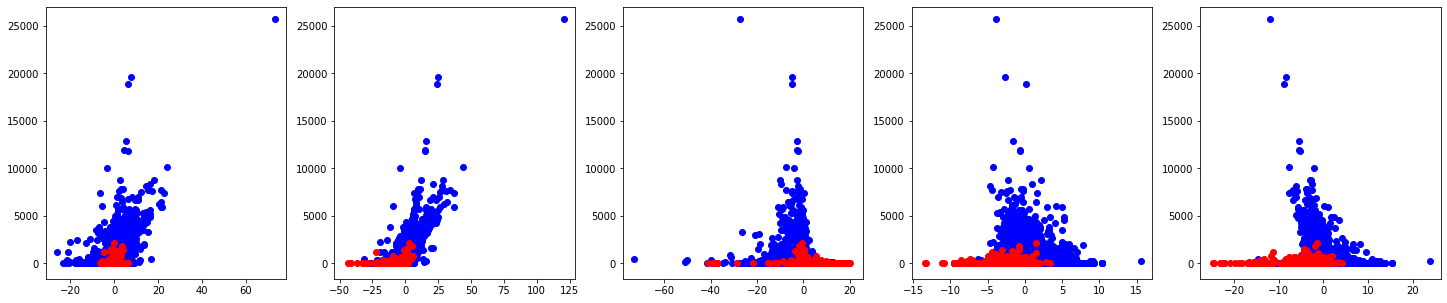

In [13]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V6'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V6'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V7'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V7'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V8'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V8'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['V9'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V9'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,5)
plt.scatter(genuine_trans['V10'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V10'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

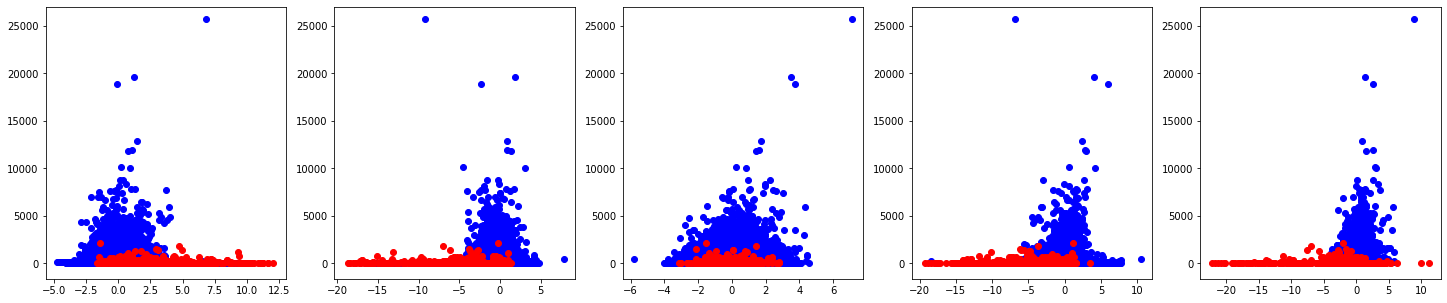

In [14]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V11'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V11'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V12'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V12'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V13'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V13'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['V14'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V14'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,5)
plt.scatter(genuine_trans['V15'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V5'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

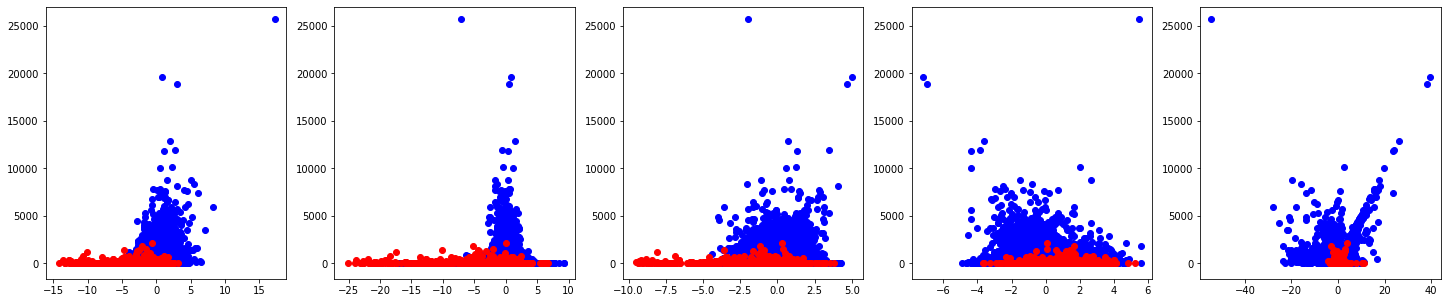

In [15]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V16'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V16'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V17'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V17'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V18'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V18'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['V19'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V19'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,5)
plt.scatter(genuine_trans['V20'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V20'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

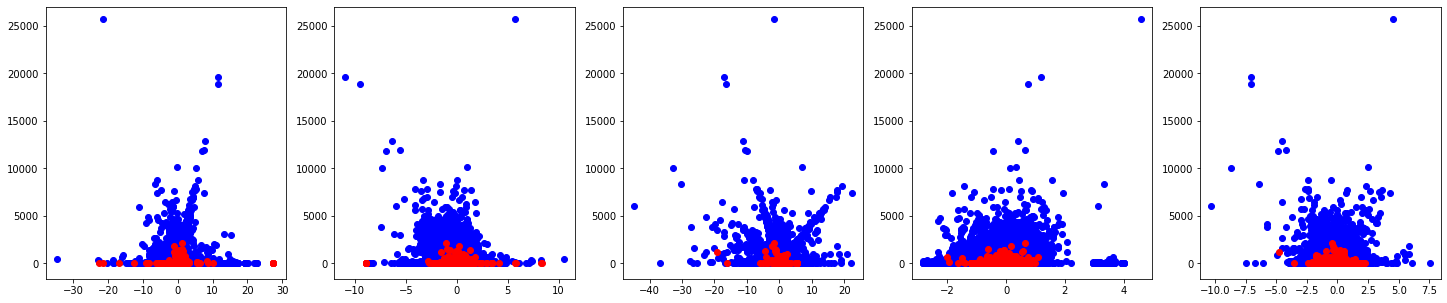

In [16]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V21'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V21'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V22'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V22'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V23'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V23'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['V24'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V24'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,5)
plt.scatter(genuine_trans['V25'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V25'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

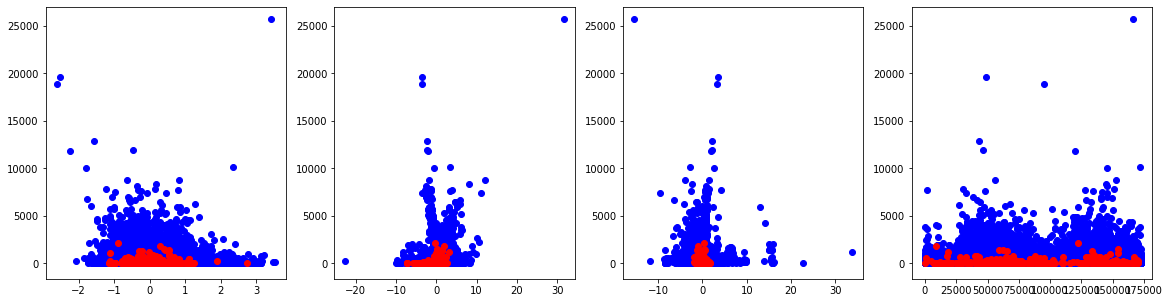

In [17]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
plt.scatter(genuine_trans['V26'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V26'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,2)
plt.scatter(genuine_trans['V27'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V27'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,3)
plt.scatter(genuine_trans['V28'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['V28'], fraud_trans['Amount'], color ='red')


plt.subplot(1,5,4)
plt.scatter(genuine_trans['Time'], genuine_trans['Amount'], color ='blue')
plt.scatter(fraud_trans['Time'], fraud_trans['Amount'], color ='red')


plt.tight_layout
plt.show()

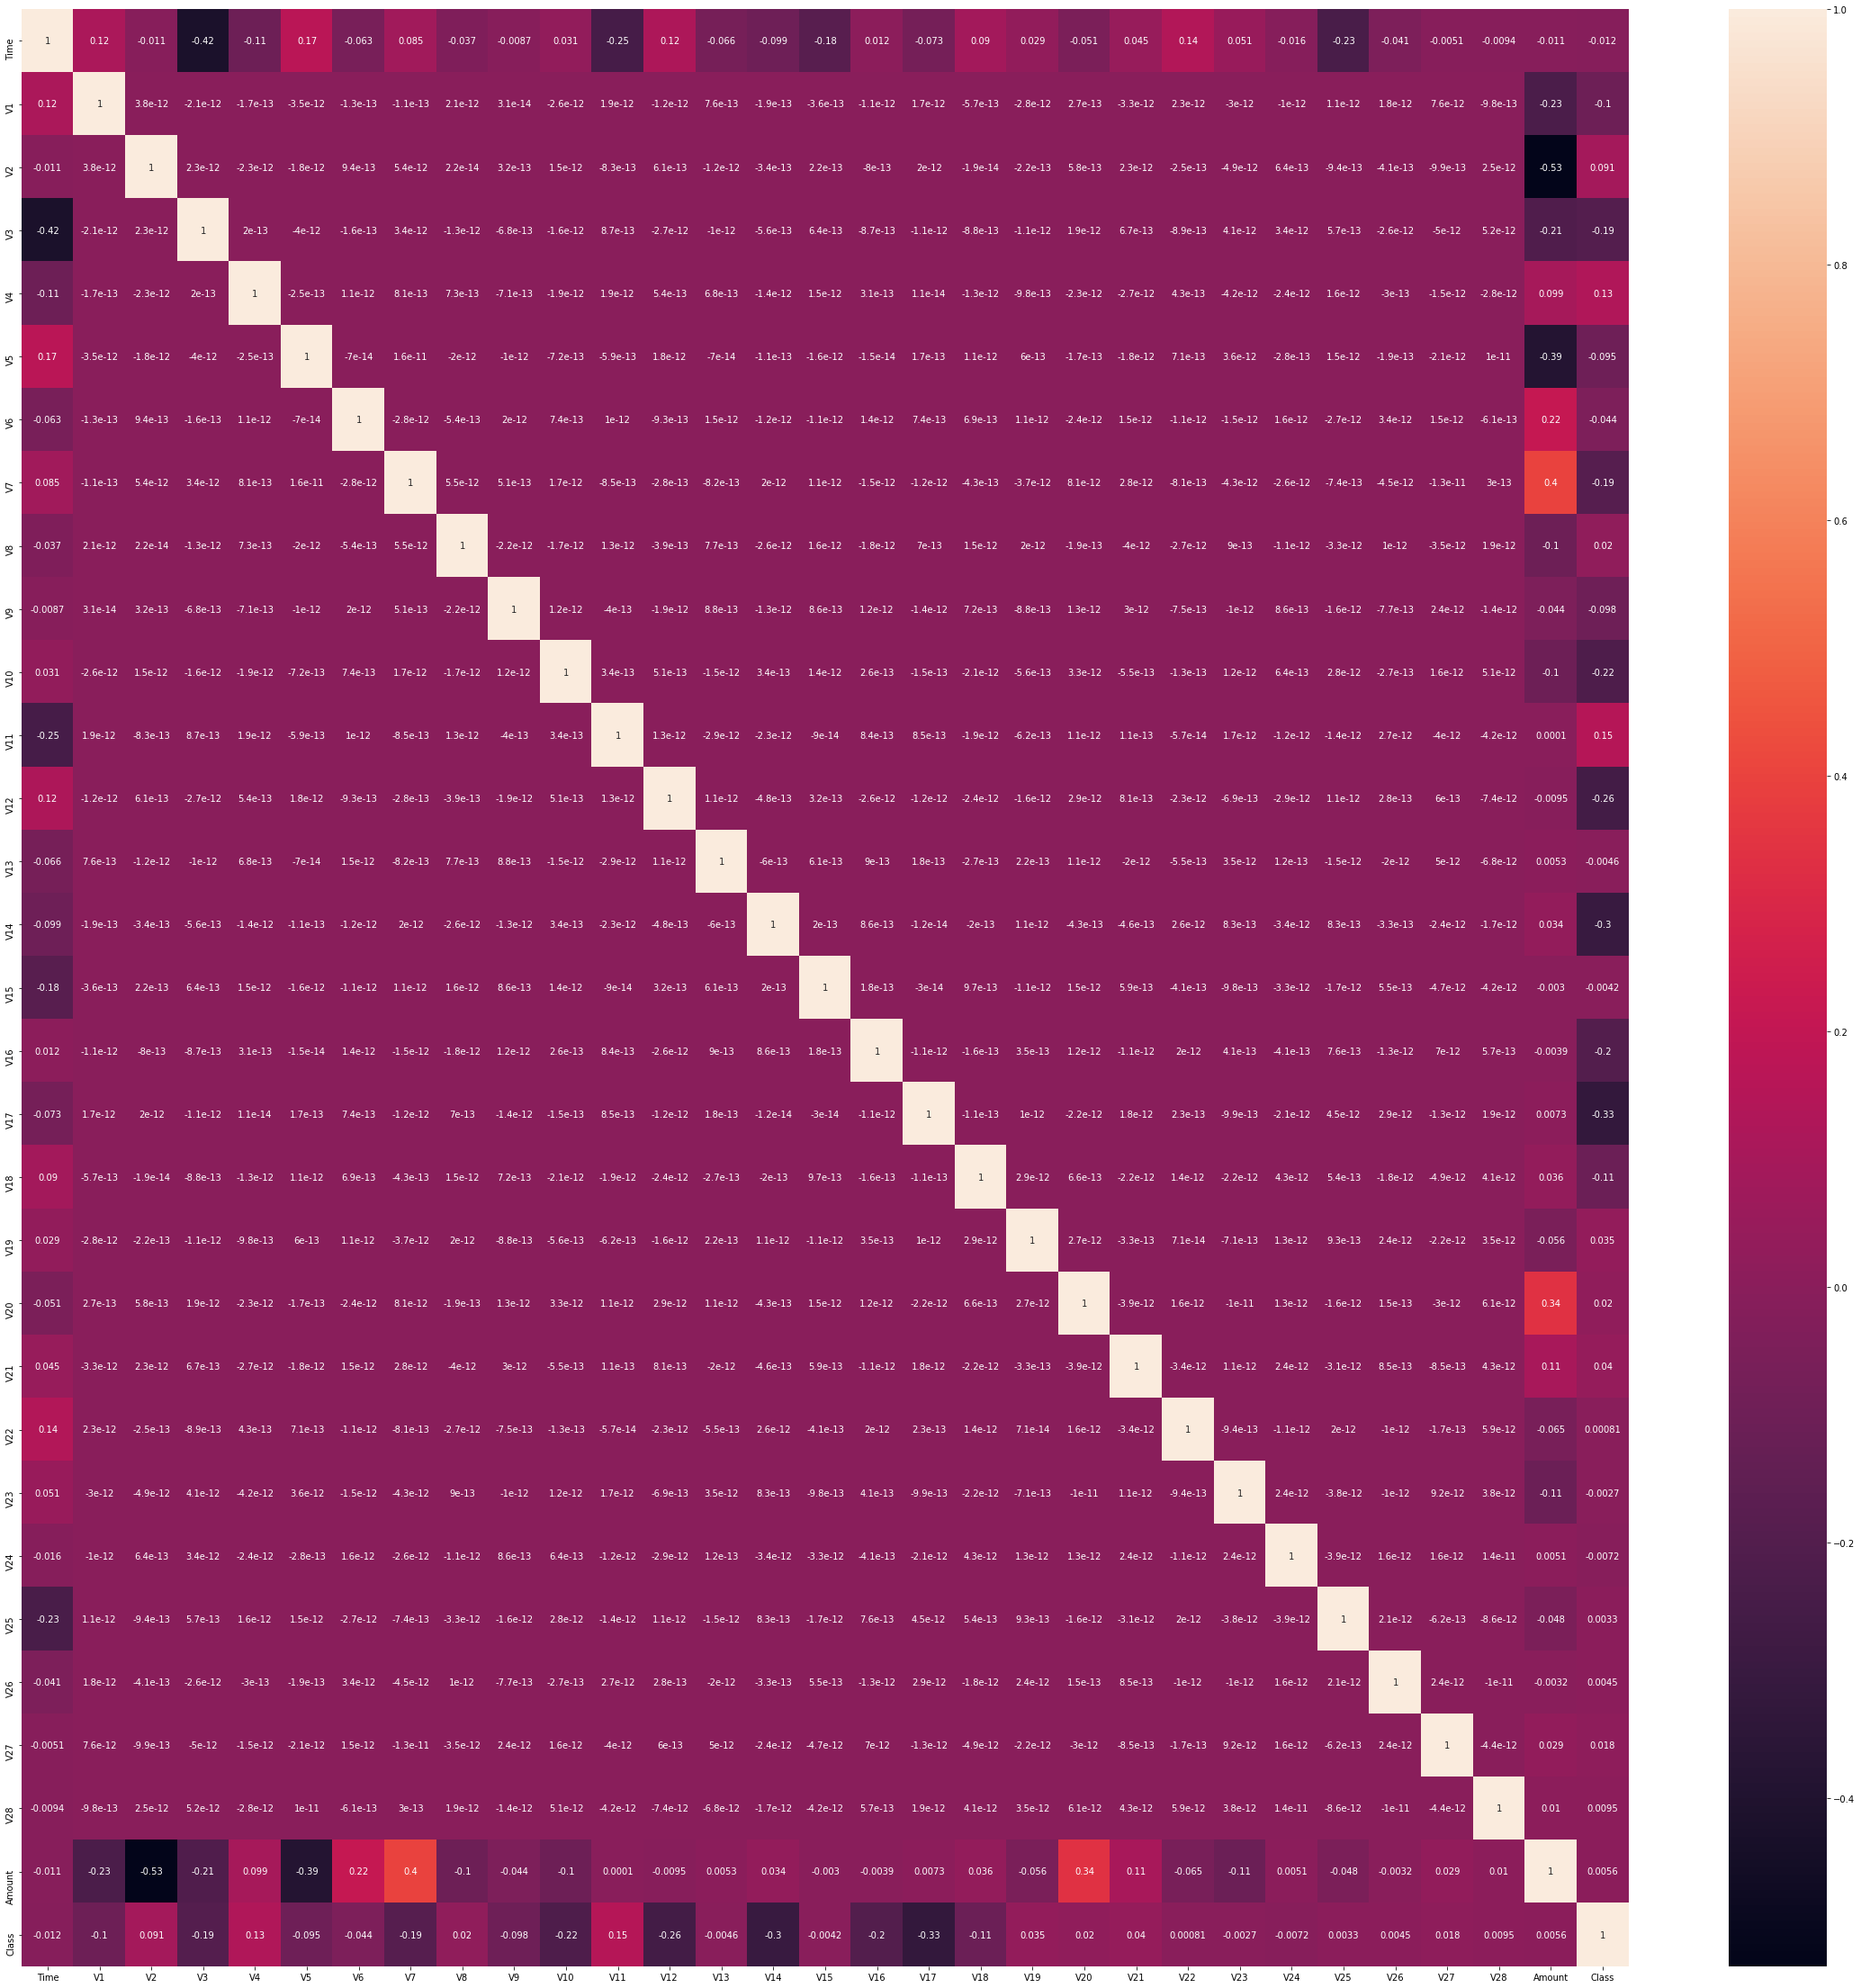

In [18]:
#Correlation Matrix
corrMatrix = creditcard_df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrMatrix, annot=True)
plt.show()


# Modeling

Modeling without resampling. This also serves as a quick evaluation to choose a candidate algorithm for further steps such as parameter tuning and resampling

In [19]:
#Creating varibales (X) and target (y) sets
from sklearn.model_selection import train_test_split
X = creditcard_df.drop('Class',axis=1)
y = creditcard_df['Class']

In [20]:
#Creating train and test sets
X0_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f'Shape of X0_train :{X0_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X0_train :(227845, 30)
Shape of X_test :(56962, 30)
Shape of y_train :(227845,)
Shape of y_test :(56962,)


In [21]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler = StandardScaler()
pca = PCA(0.95)

In [22]:
#Scaling
scaler.fit(X0_train)
X1_train = scaler.transform(X0_train)
X1_test = scaler.transform(X_test)

In [23]:
pca.fit(X1_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_ratio_

array([0.06636073, 0.05615449, 0.0346821 , 0.03381747, 0.03370853,
       0.03360049, 0.03355366, 0.0335096 , 0.03346882, 0.03343436,
       0.03343046, 0.03340114, 0.03338158, 0.03335339, 0.03330633,
       0.03329709, 0.03326001, 0.0332286 , 0.03321993, 0.03316383,
       0.03314734, 0.03312885, 0.0330676 , 0.03303711, 0.03294237,
       0.0327041 , 0.03260434])

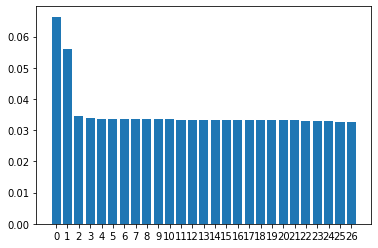

In [25]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_) 
plt.xticks(features) 
plt.show()

In [26]:
X_train = pca.transform(X1_train)
X_test = pca.transform(X1_test)

In [27]:
#Modeling unblanced dataset with kNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [28]:
#Fitting by Logistic Regression
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Predict on test dataset
lr_pred = lr.predict(X_test)

In [30]:
#check the accuracy
accuracy_score(lr_pred,y_test)

0.9991222218320986

In [31]:
#checking confustion matrix
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score

In [32]:
#computing F1 score
f1_score(y_test,lr_pred)

0.6951219512195121

In [33]:
#Recall score
recall_score(y_test,lr_pred)

0.5816326530612245

In [34]:
#Confusion matrix shows that kNN misclassifies 35/90 fraud of the test set
pd.DataFrame(confusion_matrix(y_test,lr_pred))

,0,1
0,56855,9
1,41,57


In [35]:
#Fitting by Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
#creating rf instance rf_pred
rf_pred = RandomForestClassifier()
svc = SVC()

In [37]:
rf_pred.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
#predicting the test data
random_forest_pred = rf_pred.predict(X_test)

In [39]:
#computing accuracy score
accuracy_score(random_forest_pred,y_test)

0.9994908886626171

In [40]:
#calling F1 score
f1_score(random_forest_pred,y_test)

0.8361581920903955

In [41]:
#Recall score
recall_score(random_forest_pred,y_test)

0.9367088607594937

In [42]:
#Confusion matrix
pd.DataFrame(confusion_matrix(random_forest_pred,y_test))

,0,1
0,56859,24
1,5,74


In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
gb = GradientBoostingClassifier(random_state =0)

In [44]:
#Fitting KNN
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [45]:
#Predict on test dataset with KNN
knn_pred = knn.predict(X_test)

In [46]:
#check the accuracy
accuracy_score(knn_pred,y_test)

0.999385555282469

In [47]:
#Confusion matrix shows for kNN 
pd.DataFrame(confusion_matrix(y_test,knn_pred))

,0,1
0,56859,5
1,30,68


In [48]:
#Recall score
recall_score(y_test,knn_pred)

0.6938775510204082

In [49]:
#it appears that RF performs better than logistic regression to identify the fraud

Modeling with resampling

a) Upsampling minority

In [50]:
#let's look at the train and test sets again
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(227845, 27)
Shape of X_test :(56962, 27)
Shape of y_train :(227845,)
Shape of y_test :(56962,)


In [52]:
#we will combine X_test and y_test to get ready for oversampling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


In [53]:
#Seperate minority and majority class:
not_fraud = X[X['Class'] == 0]
fraud = X[X['Class'] == 1]
print(f'Total sample which are not fraud : {len(not_fraud)}')
print(f'Total Fraud samples : {len(fraud)}')

Total sample which are not fraud : 227451
Total Fraud samples : 394


In [55]:
#Now use the oversampling techniques. We are trying to get more fraud sample to match non-frauds
from sklearn.utils import resample

random_sampling = resample(fraud,
                          replace=True,
                           n_samples = len(not_fraud),
                           random_state = 42
                          )

#combine minority and upsample data
upsample = pd.concat([not_fraud,random_sampling])

#Check new values are balances for the both classes or not
upsample['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [56]:
#Now we will split the training upsample into X_train and y_train
X_train = upsample.drop('Class',axis=1)
y_train = upsample['Class']

In [57]:
#We will use logistic regression and random forest again
#We will add the suffix _up to denote our analysis for oversampling

lr_up = LogisticRegression()
rf_up = RandomForestClassifier()

In [58]:
#fitting the logistic regression model
lr_up.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#fitting the random forest model
rf_up.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
#Let's also do cross validation score for the two models
from sklearn.model_selection import cross_val_score
cv_results_rf = cross_val_score(rf_up, X_train, y_train, cv=5).mean()
cv_results_lr = cross_val_score(lr_up, X_train, y_train, cv=5).mean()
print(cv_results_rf)
print(cv_results_lr)

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9999604310330603
0.9331284302391154


In [61]:
#Check confusion matrix for the cross validation (Logistic regression) too
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_lr = cross_val_predict(lr_up, X_train, y_train, cv=5)
conf_mat_lr = confusion_matrix(y_train, y_pred_lr)

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
pd.DataFrame(conf_mat_lr)

,0,1
0,218556,8895
1,21525,205926


In [63]:
#Confusion matrix for random forest
y_pred_rf = cross_val_predict(rf_up, X_train, y_train, cv=5)
conf_mat_rf = confusion_matrix(y_train, y_pred_rf)

In [64]:
pd.DataFrame(conf_mat_rf)

,0,1
0,227430,21
1,0,227451


In [65]:
#by oversampling, both models are improved and RF identifies most of the frauds

b) Downsample majority

In [66]:
#Resuming the dataset
X = creditcard_df.drop('Class',axis=1)
y = creditcard_df['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(227845, 30)
Shape of X_test :(56962, 30)
Shape of y_train :(227845,)
Shape of y_test :(56962,)


In [67]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

#Seperate minority and majority class:
not_fraud = X[X['Class'] == 0]
fraud = X[X['Class'] == 1]
print(f'Total sample which are not fraud : {len(not_fraud)}')
print(f'Total Fraud samples : {len(fraud)}')

Total sample which are not fraud : 227451
Total Fraud samples : 394


In [68]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [69]:
#getting the downsample dataset ready

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

In [70]:
#We will use logistic regression and random forest again
#We will add the suffix _up to denote our analysis for oversampling

lr_down = LogisticRegression()
rf_down = RandomForestClassifier()

In [71]:
#fitting the logistic regression model
lr_down.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#fitting the rf model
rf_down.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
#Let's also do cross validation score for the two models
from sklearn.model_selection import cross_val_score
cv_results_rf = cross_val_score(rf_down, X_train, y_train, cv=5).mean()
cv_results_lr = cross_val_score(lr_down, X_train, y_train, cv=5).mean()
print(cv_results_rf)
print(cv_results_lr)

0.9416592759816174
0.931460130613561


C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
#Check confusion matrix for the cross validation (Logistic regression) too
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_lr = cross_val_predict(lr_down, X_train, y_train, cv=5)
conf_mat_lr = confusion_matrix(y_train, y_pred_lr)

C:\Users\17138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
pd.DataFrame(conf_mat_lr)

,0,1
0,377,17
1,37,357


In [76]:
#Confusion matrix for random forest
y_pred_rf = cross_val_predict(rf_down, X_train, y_train, cv=5)
conf_mat_rf = confusion_matrix(y_train, y_pred_rf)
pd.DataFrame(conf_mat_rf)

,0,1
0,387,7
1,40,354


In [77]:
#by undersampling, the fraud detection is also better than doing without resampling but not as
#good as oversampling. Though the computation is much quicker but it wrongly classifies almost 10% of
#non-fraud transactions.

c) With all of the over, we will approach a predictive model with an oversampled training set for Random Forest. We will tune the hyperparameters. Then we will cross validate the best parameters and test with the testing set

In [78]:
#we will reclaim our data
X = creditcard_df.drop('Class',axis=1)
y = creditcard_df['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#we will combine X_test and y_test to get ready for oversampling
X = pd.concat([X_train, y_train], axis=1)

In [79]:
#Seperate minority and majority class:
not_fraud = X[X['Class'] == 0]
fraud = X[X['Class'] == 1]
print(f'Total sample which are not fraud : {len(not_fraud)}')
print(f'Total Fraud samples : {len(fraud)}')

Total sample which are not fraud : 227451
Total Fraud samples : 394


In [80]:
TestSet = pd.concat([X_test,y_test], axis =1)
not_fraud_test = TestSet[TestSet['Class']==0]
fraud_test  = TestSet[TestSet['Class']==1]
print(f'Total sample which are not fraud in test : {len(not_fraud_test)}')
print(f'Total Fraud samples in test : {len(fraud_test)}')

Total sample which are not fraud in test : 56864
Total Fraud samples in test : 98


In [81]:
#Now use the oversampling techniques. We are trying to get more fraud sample to match non-frauds
from sklearn.utils import resample

random_sampling = resample(fraud,
                          replace=True,
                           n_samples = len(not_fraud),
                           random_state = 42
                          )

#combine minority and upsample data
upsample = pd.concat([not_fraud,random_sampling])

#Check new values are balances for the both classes or not
upsample['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [82]:
#getting the downsample dataset ready

y_train = upsample.Class
X_train = upsample.drop('Class', axis=1)

In [83]:
rf_up = RandomForestClassifier()
rf_up.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)